# Part II - (Loan Data from Prosper Presentation )
## by (Ademola Abiodun)

## Investigation Overview
In this investigation, we look into some of the characteristics of loans that could be used to predict their borrower APR. The main focus was on the original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income.

## Dataset Overview

The dataset consisted of borrower APRs and attributes of 113,937 loans. The attributes included original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income, as well as many other features such as borrower's employment status, debt to income ratio, current loan status etc. 352 data points were removed from the analysis missing borrower APR information.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv("prosperLoanData.csv")

# Select necceasry features for the analysis in a subset data frame
features = ['LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)', 
        'EmploymentStatus', 'LoanStatus','DebtToIncomeRatio']
loan_data_sub= loan_data[features]

# Remove loans with missing borrower APR information
loan_data_sub = loan_data_sub[~loan_data_sub.BorrowerAPR.isna()]

# remove loans with stated monthly income greater than 30k, which are outliers
loan_data_sub = loan_data_sub[loan_data_sub.StatedMonthlyIncome<=30000]

# Convert ProsperRating and Employment status into ordered categorical types
ordered_rate = ['A','AA','B','C','D','E','HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = ordered_rate)
loan_data_sub['ProsperRating (Alpha)'] = loan_data_sub['ProsperRating (Alpha)'].astype(ordered_var)

ordered_emp = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = ordered_emp)
loan_data_sub['EmploymentStatus'] = loan_data_sub['EmploymentStatus'].astype(ordered_var)

loan_data_sub.shape

(113585, 9)

In [4]:
loan_data.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Distribution of Borrower APR
The distribution of Borrower APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35. Very few loans have APR greater than 0.4.

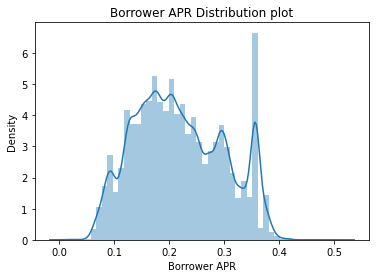

In [5]:
## Distribution plot for Borrower APR 
sb.distplot(x = loan_data['BorrowerAPR'],kde =True)
plt.xlabel("Borrower APR")
plt.title("Borrower APR Distribution plot");

## Distribution of Original Loan Amount
The large spikes in frequency are at 5k, 10k, 15k, 20k, and 25k. From the x scale we can observed that It means thatthe loans are multiples of 1k.

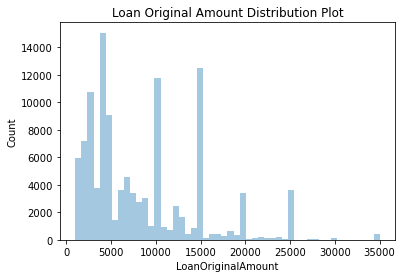

In [6]:
## Distribution plot for Loan Original Amount
sb.distplot(x = loan_data_sub['LoanOriginalAmount'], kde =False)
plt.xlabel("LoanOriginalAmount")
plt.ylabel("Count")
plt.title("Loan Original Amount Distribution Plot");

## Distribution of stated monthly income
The distribution of Stated Monthly Income variable is severely right skewed,And it also showed that most of Stated Monthly Income of the borrowers are less than 30k.


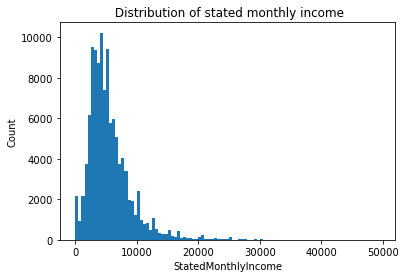

In [8]:
# Distribution of stated monthly income
bins = np.arange(0, 50000, 500)
plt.hist(data = loan_data_sub, x = 'StatedMonthlyIncome', bins=bins);
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count')
plt.title(" Distribution of stated monthly income");

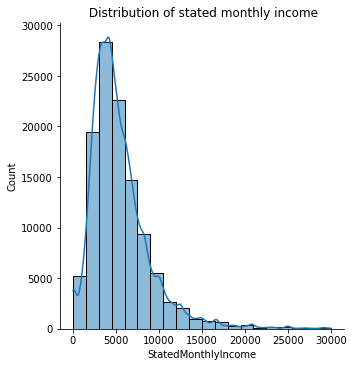

In [21]:
##Distribution plot for stated monthly income of the borrower
sb.displot(loan_data_sub, x='StatedMonthlyIncome', bins=20, kde =True)
plt.title(" Distribution of stated monthly income");

## Term Effect on Relationship between APR and Loan Amount
The loan amount increases with increase in terms. The borrower APR does not really correlate with the term of the loan.

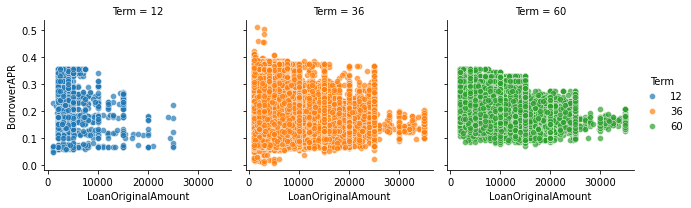

In [13]:
# Term effect on relationship of APR and loan amount
g = sb.FacetGrid(loan_data_sub, col="Term", hue="Term")
g.map(sb.scatterplot, 'LoanOriginalAmount', 'BorrowerAPR', alpha=.7)
g.add_legend();

## Prosper Rating Effect on Relationship between APR and Loan Amount
The loan amount increases with better rating. The borrower APR decreases with better rating. Interestingly, the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings are increased from HR to A or better. This is may because people with A or AA ratings tend to borrow more money, increasting APR could prevent them borrow even more and maximize the profit. But people with lower ratings tend to borrow less money, decreasing APR could encourage them to borrow more.

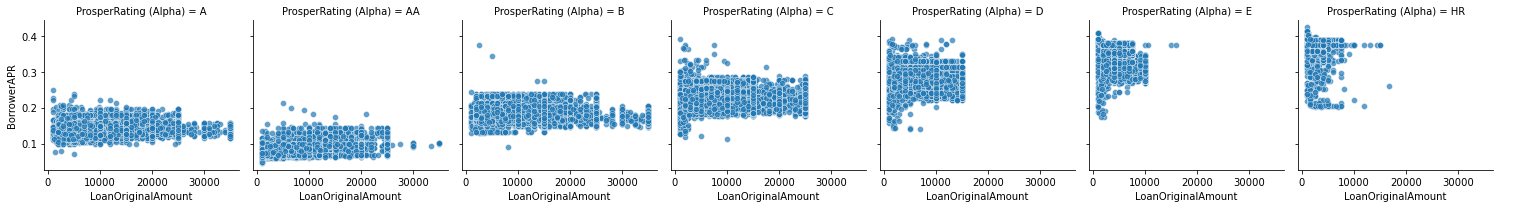

In [10]:
# # Prosper rating effect on relationship of APR and loan amount
g = sb.FacetGrid(loan_data_sub, col='ProsperRating (Alpha)')
g.map(sb.scatterplot, 'LoanOriginalAmount', 'BorrowerAPR', alpha=.7)
g.add_legend();

## Borrower APR vs. Prosper Rating
The borrower APR decreases with the increasingly better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR.

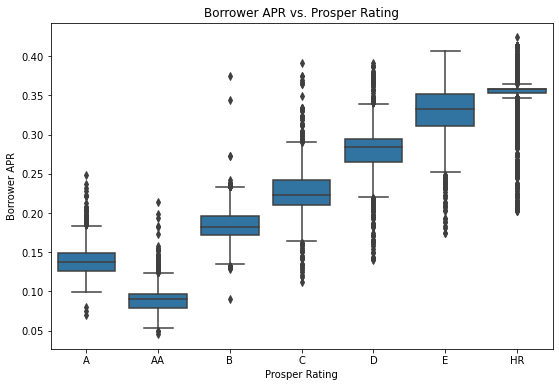

In [19]:
plt.figure(figsize=[9,6])
default_color = sb.color_palette()[0]
sb.boxplot(data=loan_data_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', color=default_color)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');

## Employment status vs Loan Term
The plot shows the employment status of the borrowers and their relation with the term of the loan

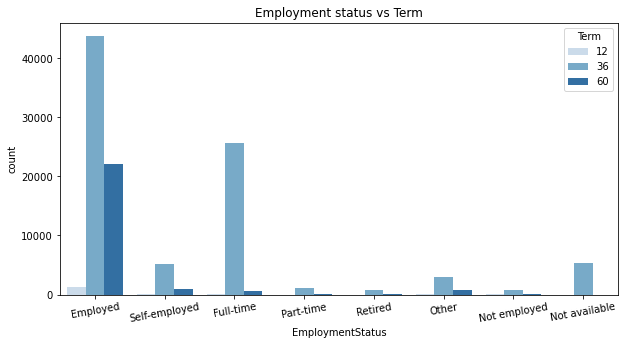

In [17]:
## Employment status vs Term
plt.figure(figsize = (10, 5))
sb.countplot(data = loan_data_sub, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10);
plt.title("Employment status vs Term")
plt.legend(loc='upper right', title='Term');

## Borrower APR by Rating and Term
Interestingly, the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

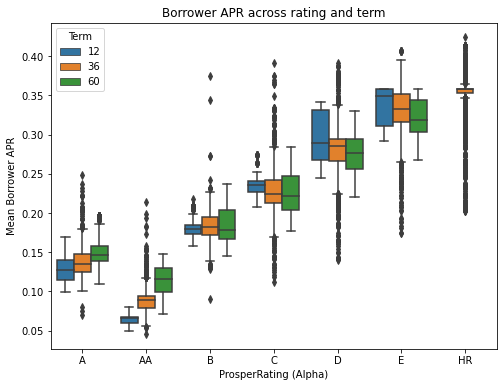

In [11]:
fig = plt.figure(figsize = [8,6])
ax = sb.boxplot(data = loan_data_sub, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

## Correlation plot
The correlation coefficient of borrower APR and loan original amount is -0.323,  loan original amount and stated monthly income is 0.404,  loan original amount and Borrower Rate is -0.329,  loan original amount and debt to income ratio is 0.011

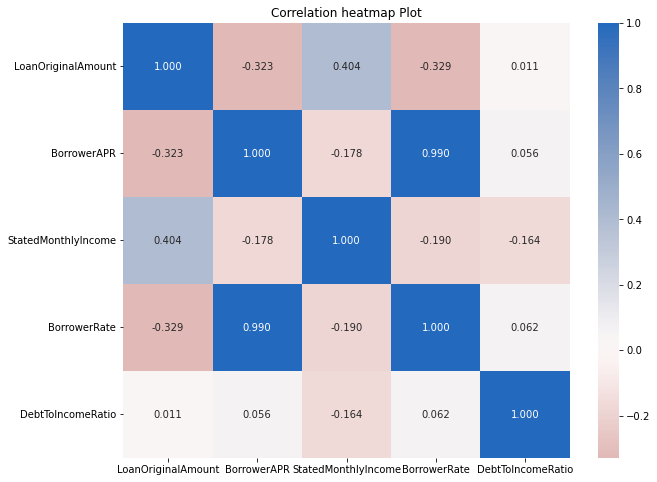

In [19]:
numeric_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','BorrowerRate','DebtToIncomeRatio']
categoric_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus','LoanStatus']

# correlation plot
plt.figure(figsize = [10, 8])
sb.heatmap(loan_data_sub[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title("Correlation heatmap Plot");

In [22]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 1021370 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/opt/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/opt/anaconda3/lib/python3.9/site-packages/jupyter_core/application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "/opt/anaconda3/lib/python3.9/site-packages/nbconvert/nbconvertapp.py", line 541, in convert_noteboo